# Problem Statement

4.	It is vital for banks that customers put in long term fixed deposits as they use it to pay interest to customers and it is<br> not viable to ask every customer if they will put in a long-term deposit or not. So, build a Logistic Regression model to <br>predict whether a customer will put in a long-term fixed deposit or not based on the different variables given in the data. <br>The output variable in the dataset is Y which is binary. Snapshot of the dataset is given below.

----- ##### -------

Lets load our dataset and necessary libraries and explore our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('bank_data.csv')
data.shape

(45211, 32)

We have 45211 rows and 32 columns in our dataset

Lets explore our dataset and perform EDA

In [3]:
# we will check for any missing value in our dataset

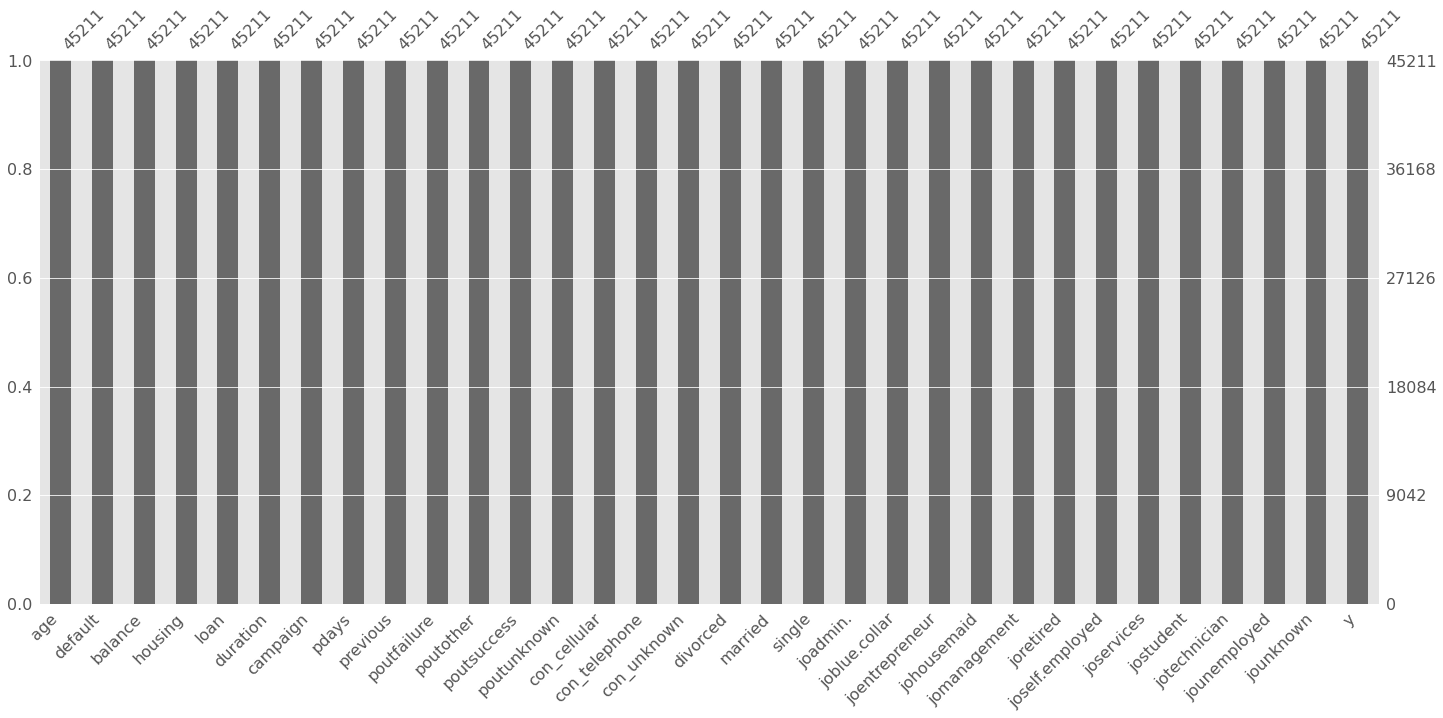

In [5]:
msno.bar(data)

There are no missing values in our dataset

In [6]:
# lets check for datatypes in our dataset

In [7]:
data.dtypes

age                int64
default            int64
balance            int64
housing            int64
loan               int64
duration           int64
campaign           int64
pdays              int64
previous           int64
poutfailure        int64
poutother          int64
poutsuccess        int64
poutunknown        int64
con_cellular       int64
con_telephone      int64
con_unknown        int64
divorced           int64
married            int64
single             int64
joadmin.           int64
joblue.collar      int64
joentrepreneur     int64
johousemaid        int64
jomanagement       int64
joretired          int64
joself.employed    int64
joservices         int64
jostudent          int64
jotechnician       int64
jounemployed       int64
jounknown          int64
y                  int64
dtype: object

In [8]:
# lets check for unique values in our dataset
data.nunique()

age                  77
default               2
balance            7168
housing               2
loan                  2
duration           1573
campaign             48
pdays               559
previous             41
poutfailure           2
poutother             2
poutsuccess           2
poutunknown           2
con_cellular          2
con_telephone         2
con_unknown           2
divorced              2
married               2
single                2
joadmin.              2
joblue.collar         2
joentrepreneur        2
johousemaid           2
jomanagement          2
joretired             2
joself.employed       2
joservices            2
jostudent             2
jotechnician          2
jounemployed          2
jounknown             2
y                     2
dtype: int64

In [9]:
data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


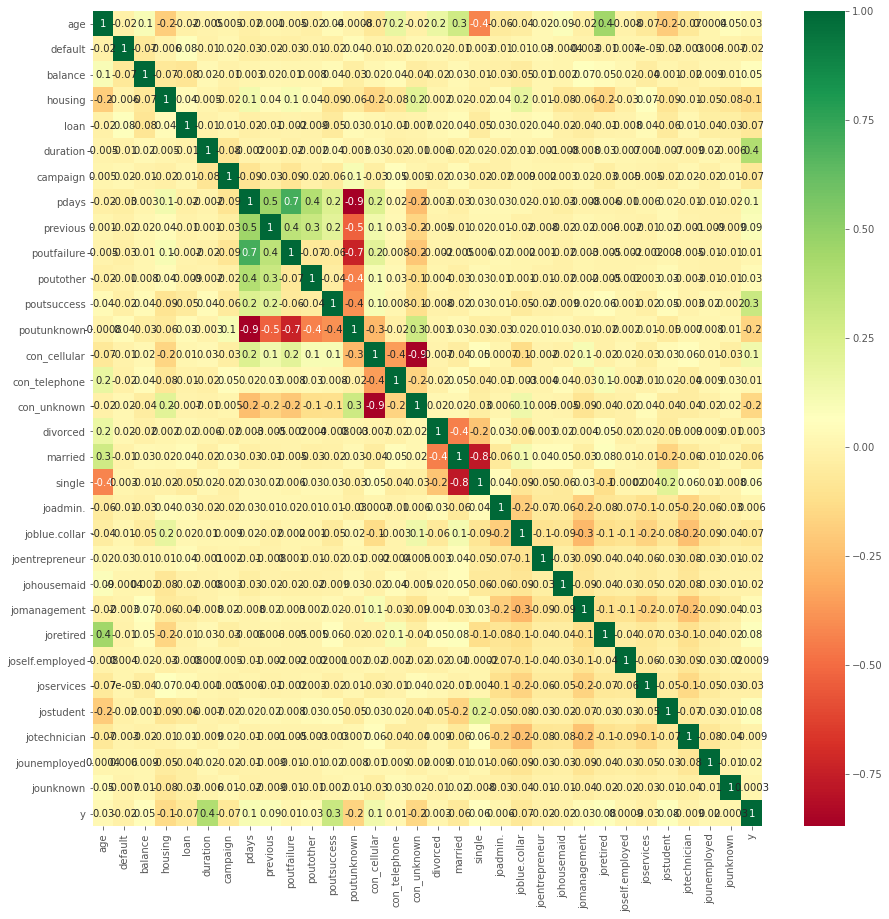

In [12]:
sns.heatmap(data.corr(),annot=True,fmt='.0g',cmap='RdYlGn')

In [16]:
data['y'].value_counts()/data.shape[0]

0    0.883015
1    0.116985
Name: y, dtype: float64

88% of the population will not put long term deposits and 11.7% of customers do

Lets BUild our model

In [18]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report

In [19]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [39]:
data.rename(columns={'joblue.collar':'joblue','joself.employed':'joselfemployed','joadmin.':'joadmin'},inplace=True)
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin', 'joblue', 'joentrepreneur',
       'johousemaid', 'jomanagement', 'joretired', 'joselfemployed',
       'joservices', 'jostudent', 'jotechnician', 'jounemployed', 'jounknown',
       'y'],
      dtype='object')

In [40]:
logit_model = sm.logit('y ~ age + default + balance + housing + loan + duration + campaign + pdays + previous + poutfailure + poutother + poutsuccess + poutunknown + con_cellular + con_telephone + con_unknown + divorced + married + single + joadmin + joblue + joentrepreneur + johousemaid + jomanagement + joretired + joselfemployed + joservices + jostudent + jotechnician + jounemployed + jounknown',data=data).fit()
logit_model.summary()

         Current function value: 0.250376
         Iterations: 35


C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45183
Method:                           MLE   Df Model:                           27
Date:                Wed, 22 Dec 2021   Pseudo R-squ.:                  0.3062
Time:                        09:27:07   Log-Likelihood:                -11320.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.0111   6.49e+05   9.26e-06      1.000   -1.27e+06    1.27e+06
age                0.0004      0.002      0.168      0.867      -0.004       0.005
default           -0.1822      0.161     -1.130      0.259      -0.498       0.134
balance         1.872e-05   4.85e-06      3.860      0.000    9.21e-06    2.82e-05
housing           -0.7756      0.040    -19.618      0.000      -0.853      -0.698
loan              -0.5720      0.058     -9.842      0.000      -0.686      -0.458
duration           0.0040   6.26e-05     64.618      0.000       0.004       0.004
campaign          -0.1093      0.010    -11.037      0.000      -0.129      -0.090
pdays              0.0001      0.000      0.479      0.632      -0.000       0.001
previous           0.0104      0.006      1.620      0.105      -0.002       0.023
poutfailure       -5.4399   3.44e+05  -1.58e-05      1.000   -6.74e+05    6.74e+05
poutother         -5.1977   3.05e+05   -1.7e-05      1.000   -5.98e+05    5.98e+05
poutsuccess       -3.1314   3.18e+05  -9.83e-06      1.000   -6.24e+05    6.24e+05
poutunknown       -5.6962   3.18e+05  -1.79e-05      1.000   -6.24e+05    6.24e+05
con_cellular      -2.5624   7.62e+05  -3.36e-06      1.000   -1.49e+06    1.49e+06
con_telephone     -2.6610   7.61e+05   -3.5e-06      1.000   -1.49e+06    1.49e+06
con_unknown       -3.7282    7.6e+05   -4.9e-06      1.000   -1.49e+06    1.49e+06
divorced          -0.3915        nan        nan        nan         nan         nan
married           -0.5547        nan        nan        nan         nan         nan
single            -0.2153        nan        nan        nan         nan         nan
joadmin            0.0705   6.19e+05   1.14e-07      1.000   -1.21e+06    1.21e+06
joblue            -0.3931   6.19e+05  -6.35e-07      1.000   -1.21e+06    1.21e+06
joentrepreneur    -0.3334   6.19e+05  -5.38e-07      1.000   -1.21e+06    1.21e+06
johousemaid       -0.5037   6.19e+05  -8.13e-07      1.000   -1.21e+06    1.21e+06
jomanagement       0.0120   6.19e+05   1.94e-08      1.000   -1.21e+06    1.21e+06
joretired          0.4055   6.19e+05   6.55e-07      1.000   -1.21e+06    1.21e+06
joselfemployed    -0.2064   6.19e+05  -3.33e-07      1.000   -1.21e+06    1.21e+06
joservices        -0.2629   6.19e+05  -4.25e-07      1.000   -1.21e+06    1.21e+06
jostudent          0.5827   6.19e+05   9.41e-07      1.000   -1.21e+06    1.21e+06
jotechnician      -0.1622   6.19e+05  -2.62e-07      1.000   -1.21e+06    1.21e+06
jounemployed      -0.1444   6.19e+05  -2.33e-07      1.000   -1.21e+06    1.21e+06
jounknown         -0.2260   6.19e+05  -3.65e-07      1.000   -1.21e+06    1.21e+06
==================================================================================
"""

In [41]:
pred = logit_model.predict(data.iloc[:,:-1])
pred

0        0.023571
1        0.017150
2        0.004325
3        0.007932
4        0.041056
           ...   
45206    0.667192
45207    0.366122
45208    0.987549
45209    0.162139
45210    0.234332
Length: 45211, dtype: float64

In [42]:
# We will try to find the optimal threshold of the prediction
fpr, tpr, thresholds = roc_curve(data.y, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11474220787661789

In [43]:
import pylab as pl

In [44]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr, index=i),'tpr': pd.Series(tpr, index = i),'1-fpr': pd.Series(1-fpr, index=i),'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
4619,0.183358,0.8166,0.816642,-0.000042,0.112521


[]

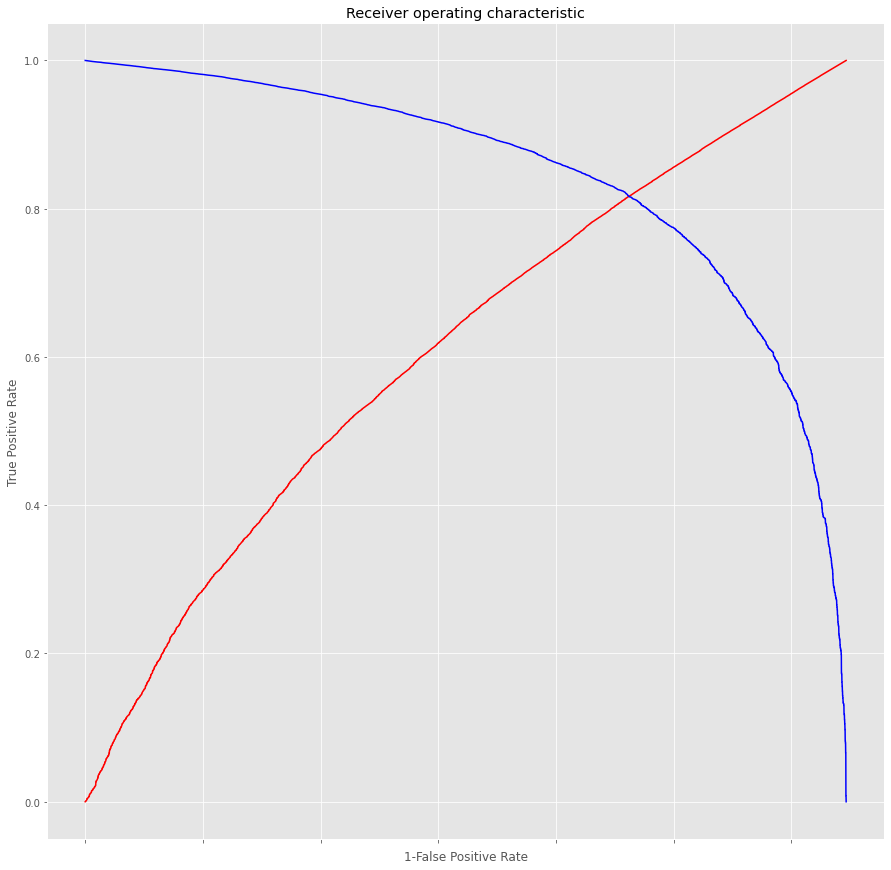

In [45]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [46]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.890843


In [47]:
data['pred'] = np.zeros(len(data['y']))
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,jomanagement,joretired,joselfemployed,joservices,jostudent,jotechnician,jounemployed,jounknown,y,pred
0,58,0,2143,1,0,261,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0.0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,1,0,0,1,0.0
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,1,0,0,0,0,0,0,1,0.0
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,1,0,0,0,0,0,0,1,0.0
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [48]:
data.loc[pred > optimal_threshold, 'pred'] = 1
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,jomanagement,joretired,joselfemployed,joservices,jostudent,jotechnician,jounemployed,jounknown,y,pred
0,58,0,2143,1,0,261,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0.0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,1,0,0,1,1.0
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,1,0,0,0,0,0,0,1,1.0
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,1,0,0,0,0,0,0,1,1.0
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [49]:
# Classification Report

classification = classification_report(data['pred'], data['y'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     33791
         1.0       0.81      0.38      0.52     11420

    accuracy                           0.82     45211
   macro avg       0.82      0.67      0.70     45211
weighted avg       0.82      0.82      0.80     45211



In [50]:
confusion_matrix = pd.crosstab(data.pred, data.y)
confusion_matrix

y,0,1
pred,,
0.0,32805,986
1.0,7117,4303


In [51]:
accuracy_score = (32805+4303)/(32805+986+7117+4303)
accuracy_score

0.8207737055141447